In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn

In [2]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe = fm.FontEntry(
    fname=r'font/NanumGothic.ttf',
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0,fe)

# pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.family':'NanumGothic','font.size':14})
# pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus']=False

In [3]:
iris = seaborn.load_dataset('iris') #붓꽃 데이터
titanic = seaborn.load_dataset('titanic') # 타이타닉 데이터
tips = seaborn.load_dataset('tips') # 팁 데이터
flights = seaborn.load_dataset('flights') # 여객기 데이터

### seaborn을 활용한 1차원 분포 플롯
seaborn 패키지에서 제공해주는 여러 가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시할 수 있음  

#### 1차원 실수 분포 플롯  
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도,러그 플롯을 제공함    
`rugplot()`:데이터 위치를 x축 위에 작은 선분으로 표시  (러그 플롯)  
`kdeplot()`:히스토그램과 비슷하지만 곡선형태로 표시 (커널 플롯)  

In [4]:
data = iris.petal_length.values
data

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

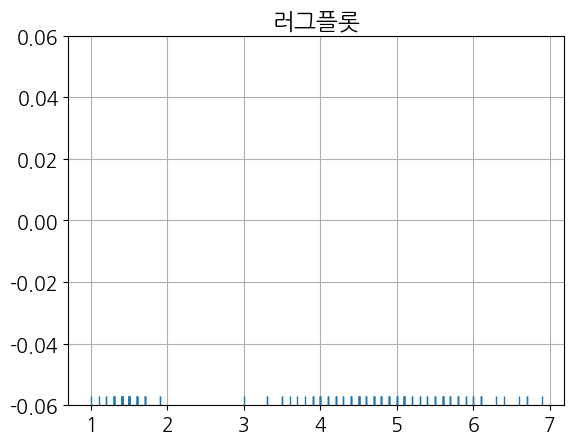

In [5]:
seaborn.rugplot(data)
plt.title('러그플롯')
plt.grid(True)
plt.show()

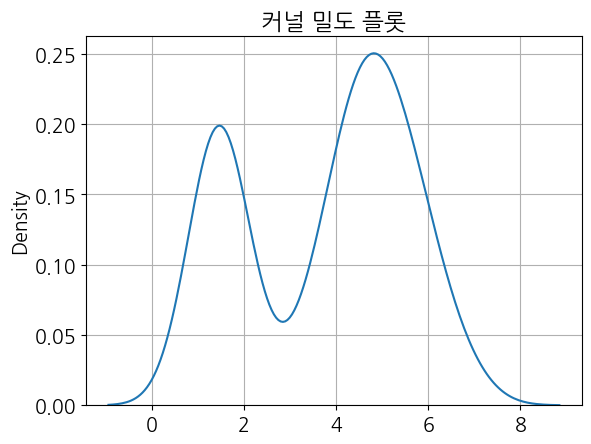

In [6]:
seaborn.kdeplot(data)
plt.title('커널 밀도 플롯')
plt.grid(True)
plt.show()

#### 카운트 플롯
seaborn 패키지의 `countplot()`메서드로 각 카테고리 별 사이즈를 표시할 수 있음  
`countplot()`메서드는 데이터 프레임만 사용 가능  
`countplot(x='컬럼명',data=데이터프레임)`  

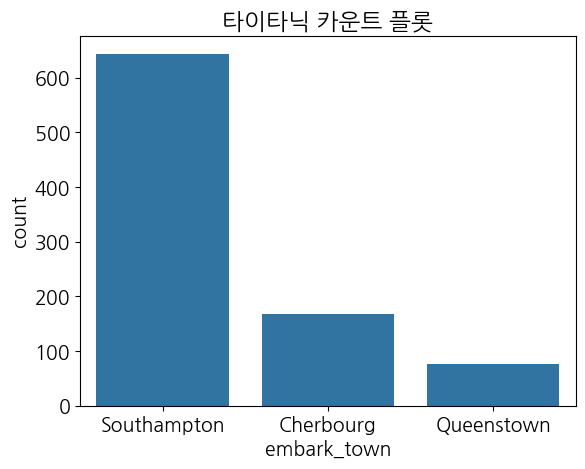

In [9]:
seaborn.countplot(x='embark_town',data=titanic)
plt.title('타이타닉 카운트 플롯')
plt.show()


In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


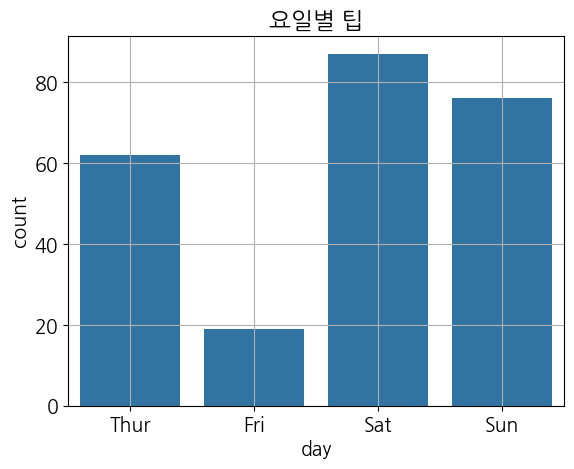

In [8]:
seaborn.countplot(x='day',data=tips)
plt.title('요일별 팁')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 데이터
다차원 데이터는 3가지 경우의 수를 가질 수 있음  

- 모든 데이터가 실수형  
- 모든 데이터가 카테고리형  
- 데이터가 실수형과 카테고리형이 섞여 있음  

#### 2차원 실수형 데이터 
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현 할 수 있음  
`jointplot()`:스캐터 플롯,등고선 플롯 등을 나타낼 수 있고 히스토그램을 표현 해 줌(데이터프레임만 사용 가능)  

In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


ValueError: Could not interpret value `sepal_lenght` for `x`. An entry with this name does not appear in `data`.

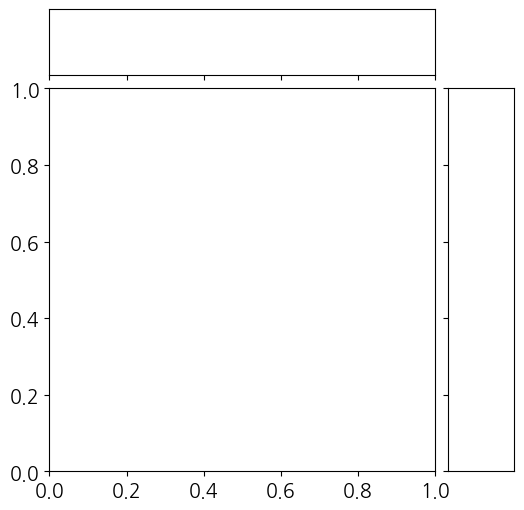

In [39]:
seaborn.jointplot(data=iris , x='sepal_lenght', y='sepal_width', kind='scatter')
plt.suptitle('꽃 받침의 길이와 넓이 비교 Joint plot',y=1.02)
plt.grid(True)
plt.show()

In [ ]:
seaborn.jointplot(data=iris,x='sepal_lenght',y='sepal_width',kind='hist')
plt.suptitle('꽃 받침의 길이와 넓이 비교 Joint plot',y=1.02)
plt.grid(True)
plt.show()

#### 다차원 실수형 데이터
3차원 이상의 데이터라면 `pairplot()`메서드로 그리드 형태의 스캐터 플롯의 행렬의 만들어 줌,같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현  

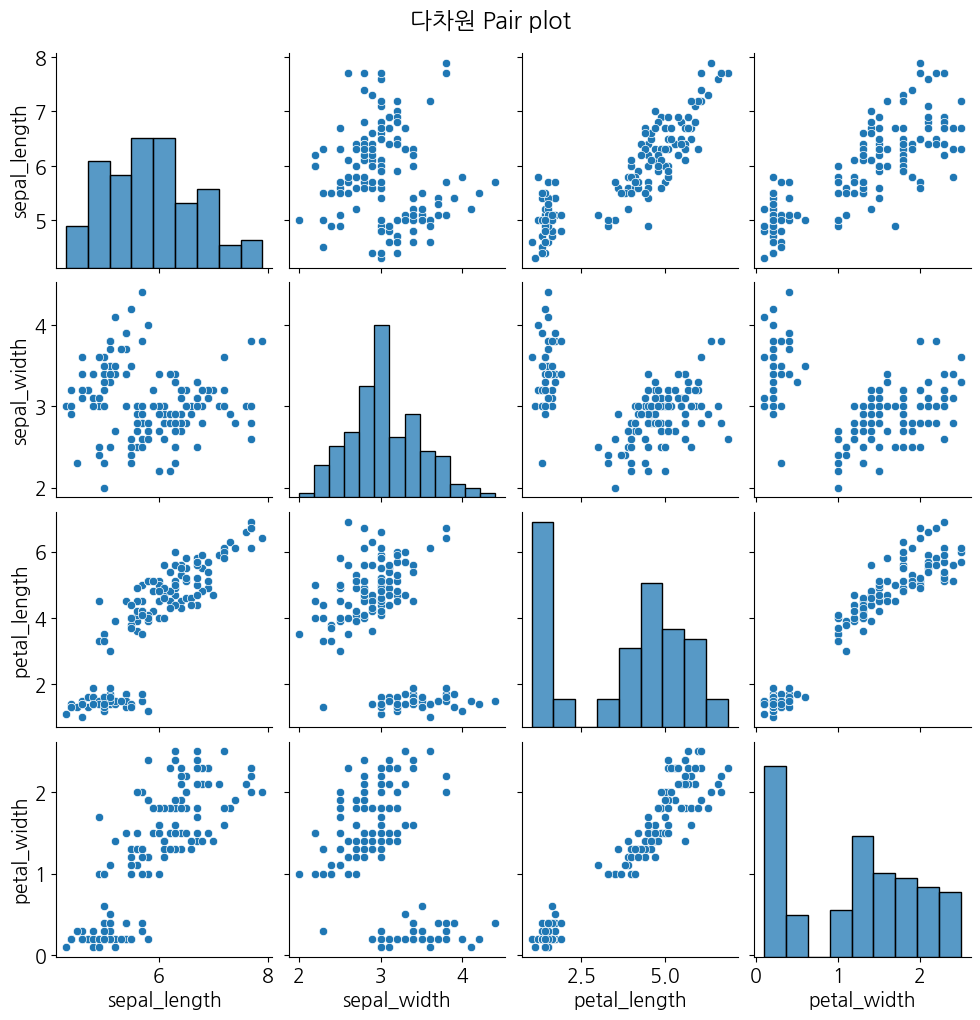

In [15]:
seaborn.pairplot(iris)
plt.suptitle('다차원 Pair plot',y=1.02)
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 `hue`인수에 카테고리 변수이름을 지정함

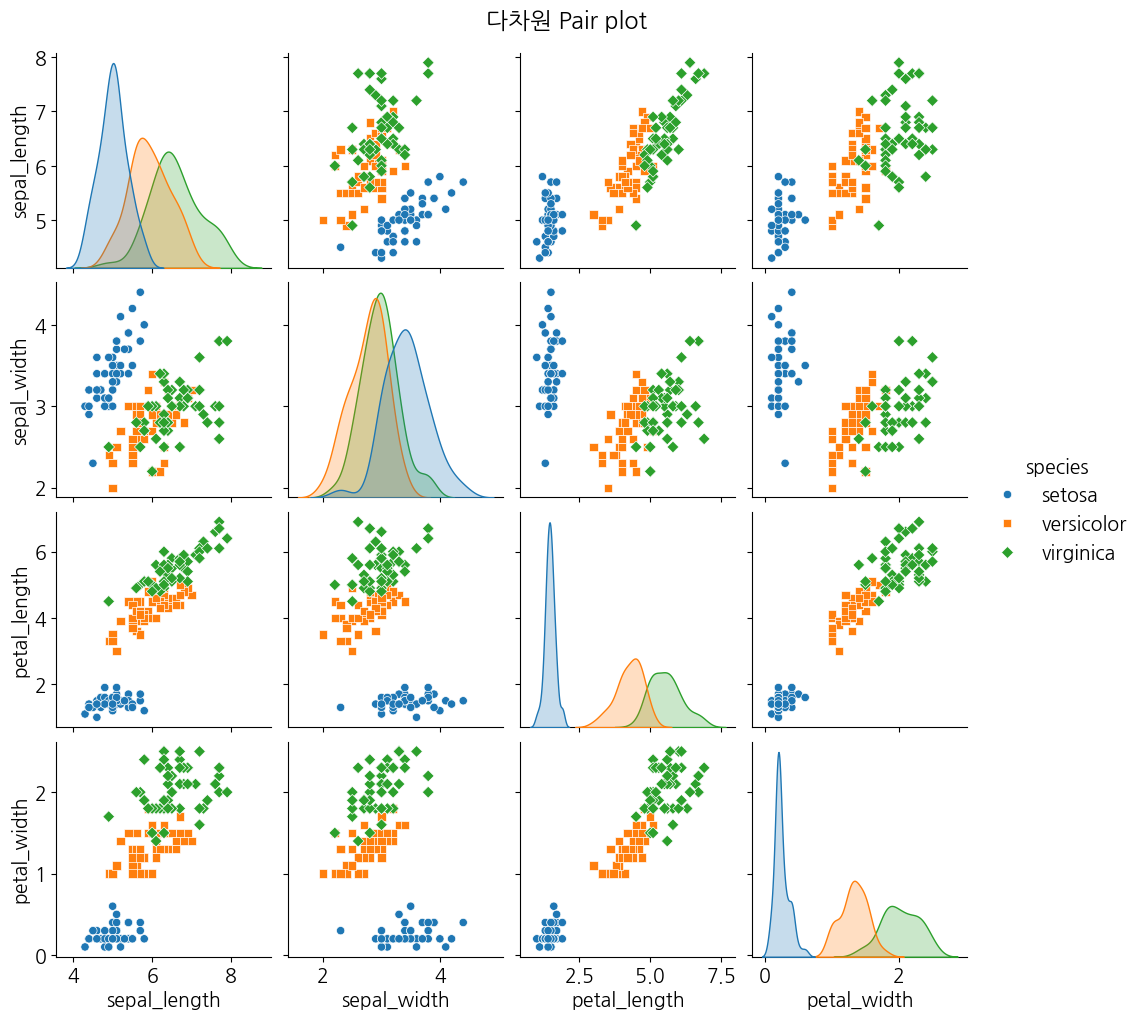

In [16]:
seaborn.pairplot(iris,hue='species',markers=['o','s','D'])
plt.suptitle('다차원 Pair plot',y=1.02)
plt.grid(True)
plt.show()

#### 2차원 카테고리 데이터 
데이터가 2차원이면서 모두 카테고리 값이면 `heatmap()`메서드로 히트맵을 표현할 수 있음  

In [7]:
titanic_size = titanic.pivot_table(
    index='class',columns='sex',aggfunc='size'
)
titanic_size

C:\Users\ITPS\AppData\Local\Temp\ipykernel_2100\3889021817.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic_size = titanic.pivot_table(


sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


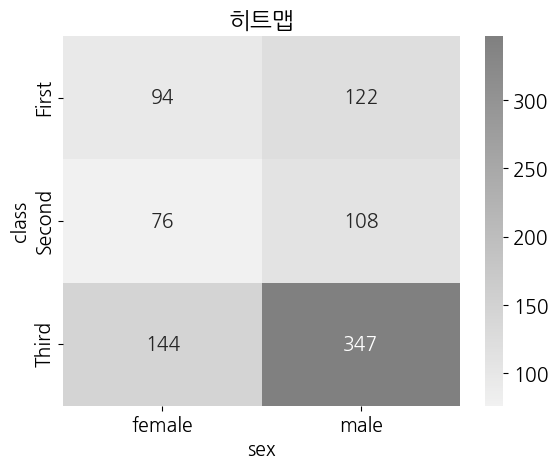

In [8]:
seaborn.heatmap(titanic_size,cmap=seaborn.light_palette('gray',as_cmap=True),annot=True,fmt='d')
plt.title('히트맵')
plt.show()

#### 2차원 복합 데이터
데이터가 2차원이면서 실수 값과 카테고리 값이 섞여 있다면 기존 플롯 외의 다른 플롯을 사용할수 있음

`barplot()`: 카테고리 값에 따른 실수 값의 평균과 표준 편차를 바 형태로 표시  
평균은 막대 그래프로,편차는 에러바로 표현

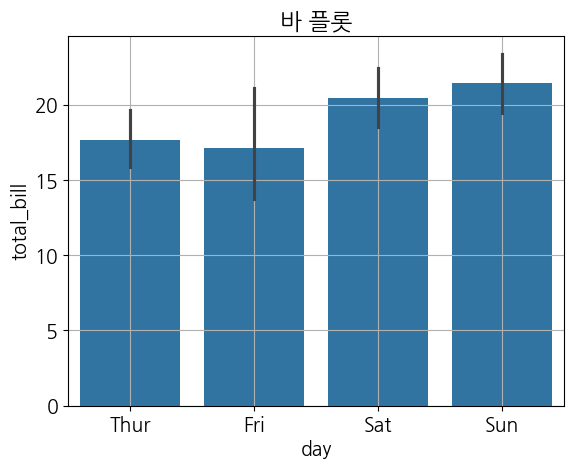

In [38]:
seaborn.barplot(data=tips,x='day',y='total_bill')
plt.title('바 플롯')
plt.grid(True)
plt.show()

`boxplot()`:사분위수와 아웃라이어라는 데이터를 표현하는 방법  

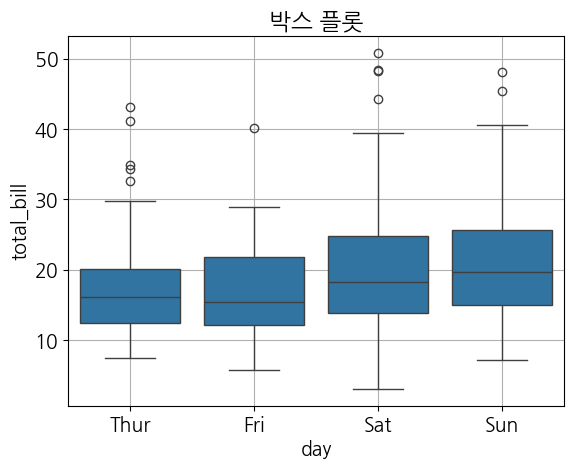

In [15]:
seaborn.boxplot(data=tips,x='day',y='total_bill')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

`violinplot()`:세로 방향으로 커널 밀도 히스토그램을 그려줌  

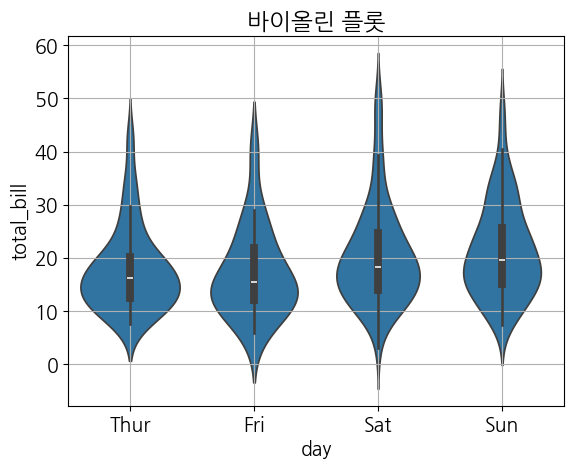

In [16]:
seaborn.violinplot(data=tips,x='day',y='total_bill')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stripplot()`:모든 데이터를 점으로 표시해서 보여줌

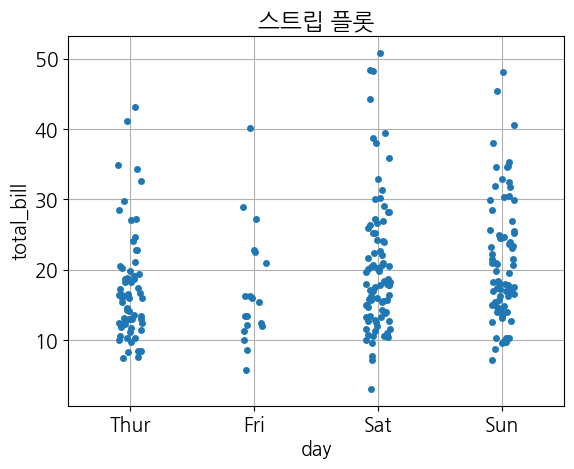

In [37]:
seaborn.stripplot(data=tips,x='day',y='total_bill')
plt.title('스트립 플롯')
plt.grid(True)
plt.show()

`swarmplot()`:스트립 플롯에서 데이터가 겹치는 부분을 겹치지 않게 표현

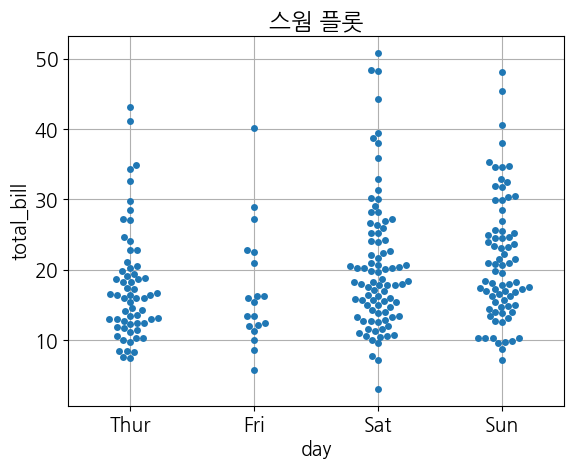

In [18]:
seaborn.swarmplot(data=tips,x='day',y='total_bill')
plt.title('스웜 플롯')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 복합 데이터 
seaborn에서 제공해주는 플롯 메서드들은 `hue`인수로 카테고리 값을 추가로 지정 할 수 있음  

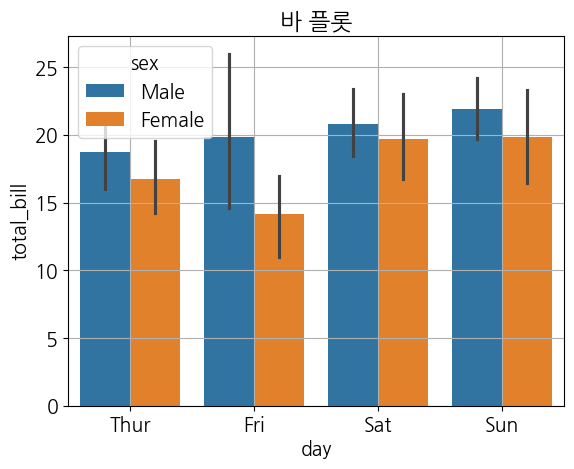

In [41]:
seaborn.barplot(data=tips,x='day',y='total_bill',hue='sex')
plt.title('바 플롯')
plt.grid(True)
plt.show()

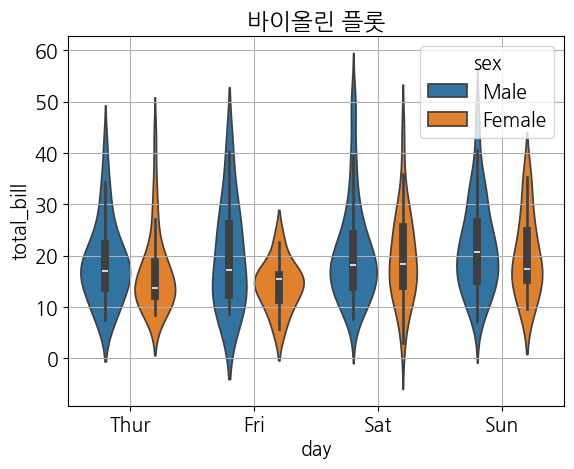

In [46]:
seaborn.violinplot(data=tips,x='day',y='total_bill',hue='sex')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stipplot()`,`swarmplot()`,`violinplot()`은 `split`,`dodge`인수로 시각화 방법을 변경할 수 있음  

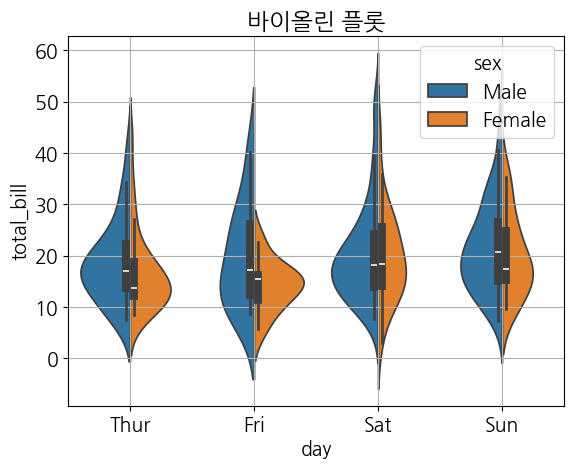

In [47]:
seaborn.violinplot(data=tips,x='day',y='total_bill',hue='sex',split=True)
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

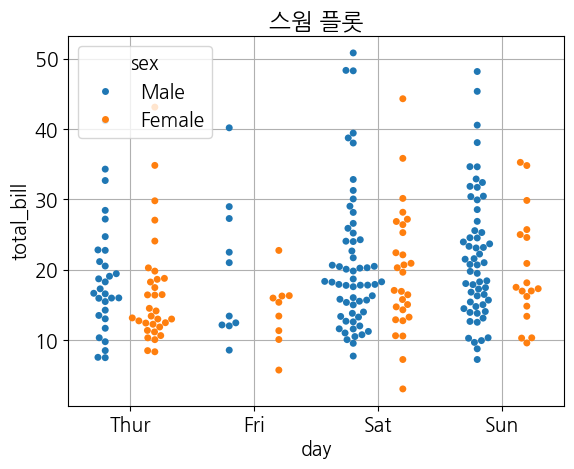

In [49]:
seaborn.swarmplot(data=tips,x='day',y='total_bill',hue='sex',dodge=True) # 스플릿 불가
plt.title('스웜 플롯')
plt.grid(True)
plt.show()

`heatmap`으로도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.

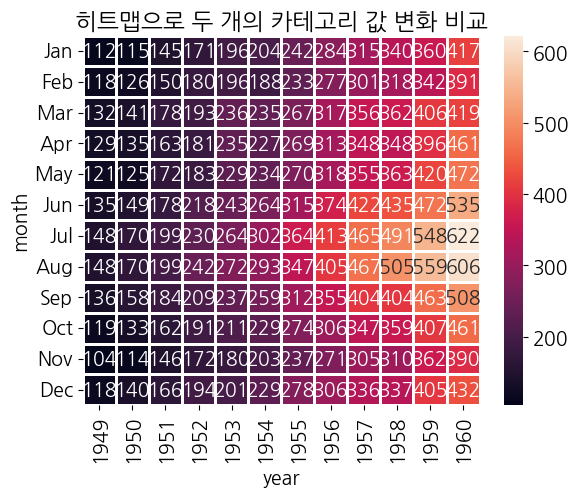

In [50]:
passengers = flights.pivot(index='month',columns='year',values='passengers')
seaborn.heatmap(passengers,annot=True,fmt='d',linewidths=1)

plt.title('히트맵으로 두 개의 카테고리 값 변화 비교')
plt.show()


### seaborn을 활용한 catplot
색상과 행을 사용해서 3개 이상의 카테고리 값의 분포를 표현  

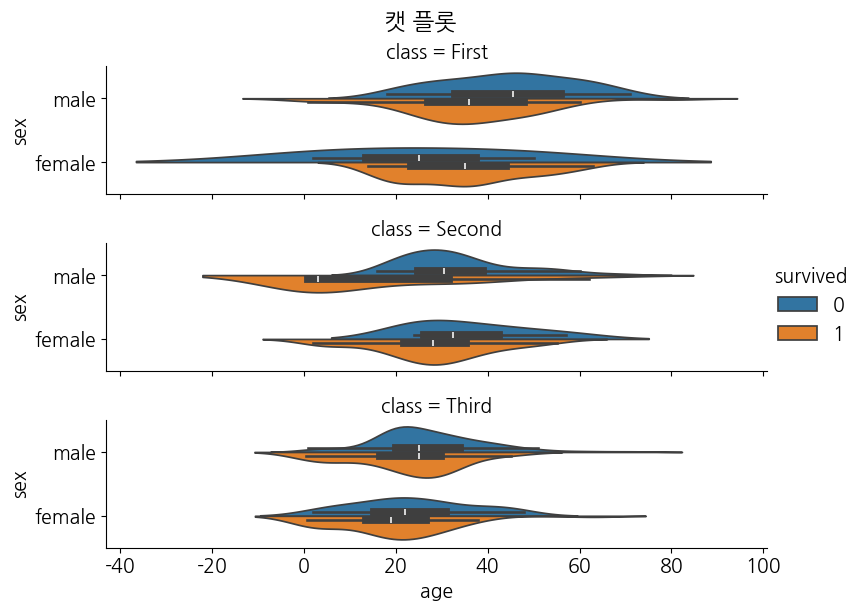

In [62]:
data = titanic[titanic.survived.notnull()]

seaborn.catplot(data=data,x='age',y='sex',hue='survived',row='class',kind='violin',split=True,height=2,aspect=4)

plt.suptitle('캣 플롯',y=1.02)
plt.show()